# <b> SyriaTel </b>

# <i> <b>Business Overview </b> </i>

# <b> <i> Data Understanding </i> </b>
---

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape

(3333, 21)

In [4]:
# Display the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# Check for duplicate values
df.duplicated().sum()

0

Based on the ``df.info`` and the ``df.duplicated().value_counts()`` outputs, there are <b> no </b> missing values and duplicate values in our dataset.

##### Descriptive Statistics

In [6]:
# Describe the data
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df["churn"].unique()

array([False,  True])

In [8]:
df["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [9]:
# explore the columns

df.columns


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [10]:
df.state.value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
VA     77
WY     77
CT     74
MI     73
ID     73
VT     73
UT     72
TX     72
IN     71
KS     70
MD     70
NJ     68
NC     68
MT     68
CO     66
WA     66
NV     66
RI     65
MS     65
MA     65
AZ     64
FL     63
MO     63
ND     62
NM     62
ME     62
OK     61
NE     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

## <i><b> Data Cleaning </i> </b>

In [11]:
# Explore the datatypes in the dataset
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [12]:
# We will change the datatype of area code from an int to an object

df['area code'] = df['area code'].astype(object)
df['area code'].dtype # Check if the change has been made


dtype('O')

In [13]:
df["phone number"].unique()

array(['382-4657', '371-7191', '358-1921', ..., '328-8230', '364-6381',
       '400-4344'], dtype=object)

## <b><i> Exploratory Data Analysis </i></b>

### Univariate Analysis

<b> Our <u>target variable in this classification model </u> is  ``churn`` </b>

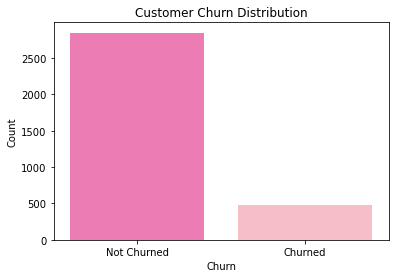

In [14]:
# Display the count of churned and non-churned counts in a bar chart 

churn_counts = df["churn"].value_counts()

# Plot the bar chart
custom_colors = ["#FF69B4", "#FFB6C1"]
sns.countplot(x="churn", data=df, palette=custom_colors)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Customer Churn Distribution")
plt.xticks([0,1], ["Not Churned", "Churned"])
plt.show()

In [15]:
# This function will be used to find the percentage value in different columns
def calculate_percentage(column):
    counts = column.value_counts()
    percentages = counts / len(column) * 100
    return percentages


In [16]:
churn_percentages = calculate_percentage(df["churn"])
print(churn_percentages)


False    85.508551
True     14.491449
Name: churn, dtype: float64


We note that majority of the customers 85.5% had not churned (2850), while 14.5 % had churned(483). 



In this project we will try and predict trends in order to reduce the number of customers that churn.

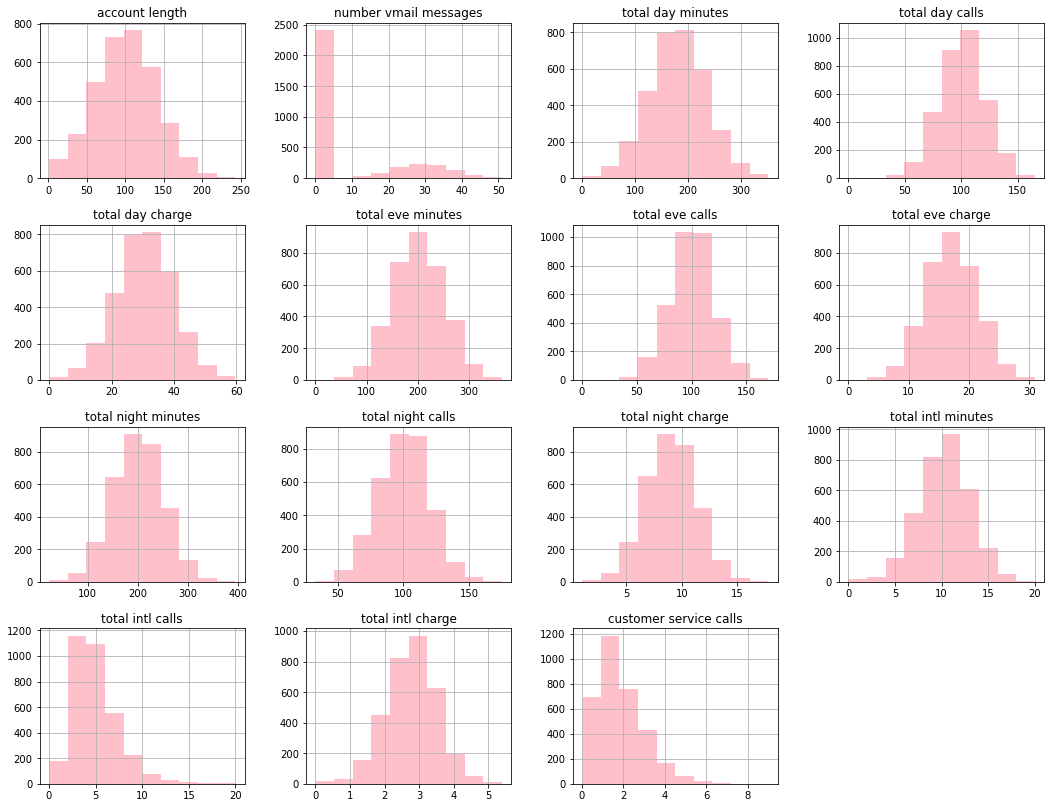

In [17]:
# The Distribution of Features

df.drop(columns='churn').hist(figsize=(18, 14), color="pink");



We notice based on this output that the features have different scalings, and we especially take note that not all of them are <b> normally distributed </b>

In [18]:
# Define a function that calls the categorical columns in the dataset
def print_categorical_columns(df):
    categorical_cols = df.select_dtypes(include='object').columns.difference(['phone number'])
    for col in categorical_cols:
        print(col.upper())
        print(df[col].unique())
        print('______________________________________________\n')

# Call the function
print_categorical_columns(df)


AREA CODE
[415 408 510]
______________________________________________

INTERNATIONAL PLAN
['no' 'yes']
______________________________________________

STATE
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
______________________________________________

VOICE MAIL PLAN
['yes' 'no']
______________________________________________



In [19]:
# Creates a Correlation Matrix & then displays it as a heatmap
corr_matrix = df.corr()
corr_matrix

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
number vmail messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493
total night calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802,0.006141


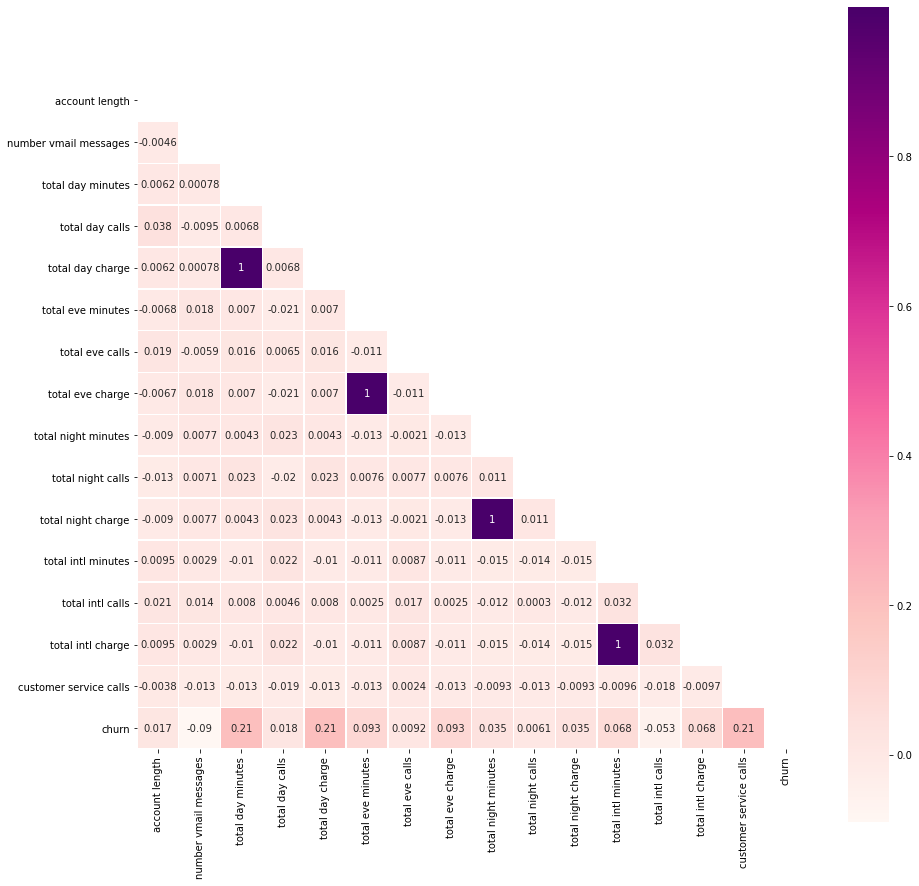

In [20]:
# Display as a heat map
#using a heatmap to show correlation
fig, ax = plt.subplots(figsize=(15,15))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), linewidths=0.5, mask=mask, square=True, ax=ax, annot=True, cmap="RdPu");

In [21]:
def check_multicollinearity(df, threshold=0.95):
    corr_matrix = df.select_dtypes(include=np.number).corr().abs()
    upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    correlated_pairs = [(col, correlated_col) for col in corr_matrix for correlated_col in corr_matrix if corr_matrix[col][correlated_col] > threshold and col != correlated_col]
    for pair in correlated_pairs:
        print(f"{pair[0]} --- {pair[1]}")
    return set(df.columns) & set([col for pair in correlated_pairs for col in pair])

# Call the function to check multicollinearity
multicollinear_features = check_multicollinearity(df)


total day minutes --- total day charge
total day charge --- total day minutes
total eve minutes --- total eve charge
total eve charge --- total eve minutes
total night minutes --- total night charge
total night charge --- total night minutes
total intl minutes --- total intl charge
total intl charge --- total intl minutes


##### <b> <u> Observations: </u></b>

The following pairs of features exhibit high correlation above the threshold of 0.95:

<ul>
<li> <code>total day minutes</code> and <code>total day charge</code></li>
<li> <code>total eve minutes</code> and <code>total eve charge</code></li>
<li> <code>total night minutes</code> and <code>total night charge</code></li>
<li> <code>total intl minutes</code> and <code>total intl charge</code></li>
</ul>


We can therefore take note that: 

There is a strong positve correlation between : 

- total day minutes and total day charge. This suggests that as the number of minutes spent on day calls increases, the corresponding charge for those calls also increases.

- total eve minutes and total eve charge. This indicates that higher evening call durations are associated with higher charges for those calls.

- total intl minutes is highly correlated with total intl charge. This indicates that longer international call durations are associated with higher charges for those calls.


In order to deal with the multicollinearity in the features, one of the features from each pair will have to be dropped. 



In [22]:
df.columns.value_counts()

total intl calls          1
total day calls           1
state                     1
total intl minutes        1
account length            1
number vmail messages     1
international plan        1
total eve calls           1
total day charge          1
area code                 1
total eve minutes         1
voice mail plan           1
customer service calls    1
total night charge        1
total night minutes       1
phone number              1
total night calls         1
churn                     1
total eve charge          1
total intl charge         1
total day minutes         1
dtype: int64

In [23]:
# Drop some columns

df = df.drop(columns=['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'])
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day calls', 'total day charge', 'total eve calls',
       'total eve charge', 'total night calls', 'total night charge',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [24]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False


##### Feature Engineering

In [26]:
# Feature Engineering -- Total Expenditure 
# This will calculate the total expenditure for each customer


df['total_expenditure'] = df['total day charge'] \
                        + df['total eve charge'] \
                        + df['total night charge'] \
                        + df['total intl charge']

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,total_expenditure
0,KS,128,415,382-4657,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False,75.56
1,OH,107,415,371-7191,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False,59.24
2,NJ,137,415,358-1921,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False,62.29
3,OH,84,408,375-9999,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False,66.80
4,OK,75,415,330-6626,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False,52.09
